## Telecom Churn Case Study


#### Steps for building models 
- Importing Data, perform EDA, drop data not required for analysis
- Data imputation
- Derive new variables
- Derive high value customers
- Outlier treatment
- Derive high value customers
- Data visualization and more EDA
- Train and split 
- Model 1  
- Perform PCA, handle data imbalance
- Model 2
- Model 3
- Model 4
- Summary

### Importing Data, perform EDA, Data preparation

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
# Setting for display of all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [3]:
# Importing dataset
telecom_data = pd.read_csv("telecom_churn_data.csv")
telecom_data_orig = telecom_data.copy(deep=True)
telecom_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  7000842753     109        0.0             0.0             0.0              
1  7001865778     109        0.0             0.0             0.0              
2  7001625959     109        0.0             0.0             0.0              
3  7001204172     109        0.0             0.0             0.0              
4  7000142493     109        0.0             0.0             0.0              

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0  6/30/2014            7/31/2014            8/31/2014             
1  6/30/2014            7/31/2014            8/31/2014             
2  6/30/2014            7/31/2014            8/31/2014             
3  6/30/2014            7/31/2014            8/31/2014             
4  6/30/2014            7/31/2014            8/31/2014             

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0  9/30/2014            197.385  214.816  213.803  21.100  NaN            
1  9/30/2014            34.047   355.074  268.321  86.285   24.11         
2  9/30/2014            167.690  189.058  210.226  290.714  11.54         
3  9/30/2014            221.338  251.102  508.054  389.500  99.91         
4  9/30/2014            261.636  309.876  238.174  163.426  50.31         

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0 NaN           0.00        NaN          NaN           NaN             
1  78.68        7.68         18.34        15.74         99.84          
2  55.24        37.26        74.81        143.33        220.59         
3  54.39        310.98       241.71       123.31        109.01         
4  149.44       83.89        58.78        76.96         91.88          

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0  0.00         NaN           NaN            NaN             0.00            
1  304.76        53.76         0.0            0.00           0.00            
2  208.36        118.91        0.0            0.00           0.00            
3  71.68         113.54        0.0            54.86          44.38           
4  124.26        45.81         0.0            0.00           0.00            

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0 NaN            NaN            NaN             0.00          NaN              
1  0.00           0.0            0.00           0.00           0.00            
2  38.49          0.0            0.00           0.00           70.94           
3  0.00           0.0            28.09          39.04          0.00            
4  0.00           0.0            0.00           0.00           0.00            

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0 NaN               NaN                0.00             NaN                 
1  23.88             74.56             7.68              18.34              
2  7.19              28.74             13.58             14.39              
3  73.68             34.81             10.61             15.49              
4  50.31             149.44            83.89             58.78              

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0 NaN               NaN                0.00             NaN                 
1  11.51             75.94             291.86            53.76              
2  29.34             16.86             38.46             28.16              
3  107.43            83.21             22.46             65.46              
4  67.64             91.88             124.26            37.89              

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0 NaN               NaN                0.00             NaN                 
1  0.00              0.00              0.00              0.00               
2  24.11             21.79             15.61             22.24              
3  1.91              0.65              4.91        

In [4]:
# EDA @1 : There are quite a few colums which we might not for out analysis such as mobile number and dates


In [5]:
#Lets check shape and data types
telecom_data.info()
# EDA @2:  The Csv has 100000 customer information and 226 columns
# EDA @3: 214 Numerical columns include float and int types
# EDA @4: 12 Categorical columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
#Lets check the data distribution

telecom_data.describe(percentiles=[0.02, 0.25, 0.50, 0.75, 0.92])

#EDA @5: Lets check Count, total_rech_data_X, max_rech_data_X, count_rech_2g_X, av_rech_amt_data_X,  are mostly empty 
#EDA @6: On Analyzing mean some columns have only single data , circle_id, loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou
#EDA @7: On Analyzing max and 75%, seems like there are many columns with outliers arpu_X, onnet_X, offnet_X, etc 

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  9.999900e+04   99999.0    98981.0         98981.0          
mean   7.001207e+09   109.0      0.0             0.0              
std    6.956694e+05   0.0        0.0             0.0              
min    7.000000e+09   109.0      0.0             0.0              
2%     7.000048e+09   109.0      0.0             0.0              
25%    7.000606e+09   109.0      0.0             0.0              
50%    7.001205e+09   109.0      0.0             0.0              
75%    7.001812e+09   109.0      0.0             0.0              
92%    7.002221e+09   109.0      0.0             0.0              
max    7.002411e+09   109.0      0.0             0.0              

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count  98981.0         99999.000000  99999.000000  99999.000000  99999.000000   
mean   0.0             282.987358    278.536648    279.154731    261.645069     
std    0.0             328.439770    338.156291    344.474791    341.998630     
min    0.0            -2258.709000  -2014.045000  -945.808000   -1899.505000    
2%     0.0             0.000000      0.000000      0.000000      0.000000       
25%    0.0             93.411500     86.980500     84.126000     62.685000      
50%    0.0             197.704000    191.640000    192.080000    176.849000     
75%    0.0             371.060000    365.344500    369.370500    353.466500     
92%    0.0             686.664760    683.573520    685.047640    664.194040     
max    0.0             27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean   132.395875    133.670805    133.018098    130.302327    197.935577     
std    297.207406    308.794148    308.951589    308.477668    316.851613     
min    0.000000      0.000000      0.000000      0.000000      0.000000       
2%     0.000000      0.000000      0.000000      0.000000      0.000000       
25%    7.380000      6.660000      6.460000      5.330000      34.730000      
50%    34.310000     32.330000     32.360000     29.840000     96.310000      
75%    118.740000    115.595000    115.860000    112.130000    231.860000     
92%    420.674400    430.126800    428.090000    423.798000    550.772000     
max    7376.710000   8157.780000   10752.560000  10427.460000  8362.360000    

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000  96062.000000   96140.000000    
mean   197.045133    196.574803    190.337222    9.950013       7.149898        
std    325.862803    327.170662    319.396092    72.825411      73.447948       
min    0.000000      0.000000      0.000000      0.000000       0.000000        
2%     0.000000      0.000000      0.000000      0.000000       0.000000        
25%    32.190000     31.630000     27.130000     0.000000       0.000000        
50%    91.735000     92.140000     87.290000     0.000000       0.000000        
75%    226.815000    228.260000    220.505000    0.000000       0.000000        
92%    557.560000    558.920000    545.786000    19.042400      9.430000        
max    9667.130000   14007.340000  10310.760000  13724.380000   15371.040000    

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count  94621.000000   92254.000000   96062.000000   96140.000000    
mean   7.292981       6.343841       13.911337      9.818732        
std    68.402466      57.137537      71.443196      58.455762       
min    0.000000       0.000000       0.000000       0.000000        
2%     0.000000       0.000000       0.000000       0.000000        
25%    0.000000       0.000000       0.000000       0.000000        
50%    0.000000       0.000000       0.000000       0.000000        
75%    0.000000       0.000000       0.000000       0.000000   

In [7]:
#Based on EDA 1 and 6, deleting some of the columns 
del_columns = ['mobile_number', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7',  'date_of_last_rech_data_8', 'date_of_last_rech_data_9',  'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9',  'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou']
telecom_data.drop(del_columns, axis=1, inplace=True)

In [8]:
# LEts check null value percentage
100 * telecom_data.isna().sum() / telecom_data.shape[0]

arpu_6                0.000000 
arpu_7                0.000000 
arpu_8                0.000000 
arpu_9                0.000000 
onnet_mou_6           3.937039 
onnet_mou_7           3.859039 
onnet_mou_8           5.378054 
onnet_mou_9           7.745077 
offnet_mou_6          3.937039 
offnet_mou_7          3.859039 
offnet_mou_8          5.378054 
offnet_mou_9          7.745077 
roam_ic_mou_6         3.937039 
roam_ic_mou_7         3.859039 
roam_ic_mou_8         5.378054 
roam_ic_mou_9         7.745077 
roam_og_mou_6         3.937039 
roam_og_mou_7         3.859039 
roam_og_mou_8         5.378054 
roam_og_mou_9         7.745077 
loc_og_t2t_mou_6      3.937039 
loc_og_t2t_mou_7      3.859039 
loc_og_t2t_mou_8      5.378054 
loc_og_t2t_mou_9      7.745077 
loc_og_t2m_mou_6      3.937039 
loc_og_t2m_mou_7      3.859039 
loc_og_t2m_mou_8      5.378054 
loc_og_t2m_mou_9      7.745077 
loc_og_t2f_mou_6      3.937039 
loc_og_t2f_mou_7      3.859039 
loc_og_t2f_mou_8      5.378054 
loc_og_t

In [9]:
# Based on EDA 5 and above analysis, if more than 70% data is missing in the column then deleting the column . Considering imputing only if < 30 % data missing
del_columns = ['fb_user_6' , 'fb_user_7', 'fb_user_8', 'fb_user_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8' , 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']
telecom_data.drop(del_columns, axis=1, inplace=True)


In [10]:

## NOTE: All the analysis will be based on calls not mobile data. Because in my opinion we should not try to impute data in which above 70% is missing

In [11]:
# Lets check the numerical and categorical columns after dropping some columns
cat_cols= telecom_data.select_dtypes(include=['object']).columns
num_cols=telecom_data.select_dtypes(include=['float64', 'int64']).columns
print("categorical :", cat_cols)
print("numerical :", num_cols)

categorical : Index([], dtype='object')
numerical : Index(['arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7',
       ...
       'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'sachet_3g_9', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g'],
      dtype='object', length=173)


In [12]:
# Lets check unique values in numerical_cols
for col in num_cols:
    print(col)
    print(telecom_data[col].nunique())

arpu_6
85681
arpu_7
85308
arpu_8
83615
arpu_9
79937
onnet_mou_6
24313
onnet_mou_7
24336
onnet_mou_8
24089
onnet_mou_9
23565
offnet_mou_6
31140
offnet_mou_7
31023
offnet_mou_8
30908
offnet_mou_9
30077
roam_ic_mou_6
6512
roam_ic_mou_7
5230
roam_ic_mou_8
5315
roam_ic_mou_9
4827
roam_og_mou_6
8038
roam_og_mou_7
6639
roam_og_mou_8
6504
roam_og_mou_9
5882
loc_og_t2t_mou_6
13539
loc_og_t2t_mou_7
13411
loc_og_t2t_mou_8
13336
loc_og_t2t_mou_9
12949
loc_og_t2m_mou_6
20905
loc_og_t2m_mou_7
20637
loc_og_t2m_mou_8
20544
loc_og_t2m_mou_9
20141
loc_og_t2f_mou_6
3860
loc_og_t2f_mou_7
3863
loc_og_t2f_mou_8
3807
loc_og_t2f_mou_9
3758
loc_og_t2c_mou_6
2235
loc_og_t2c_mou_7
2426
loc_og_t2c_mou_8
2516
loc_og_t2c_mou_9
2332
loc_og_mou_6
26372
loc_og_mou_7
26091
loc_og_mou_8
25990
loc_og_mou_9
25376
std_og_t2t_mou_6
18244
std_og_t2t_mou_7
18567
std_og_t2t_mou_8
18291
std_og_t2t_mou_9
17934
std_og_t2m_mou_6
19734
std_og_t2m_mou_7
20018
std_og_t2m_mou_8
19786
std_og_t2m_mou_9
19052
std_og_t2f_mou_6
2450
std_og

In [13]:
# EDA @ 8: There are some features where the there is only one value, example 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'
# EDA @ 9: There are some feature with unique value < 150.

In [14]:
# As result of EDA 8, dropping these columns
drop_col = ['std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']
telecom_data.drop(drop_col, axis=1, inplace=True)

In [15]:
telecom_data.shape

(99999, 165)

### Data imputation

In [114]:
#Recheck if we are left with columns with < 30 % missing
100*telecom_data.isnull().sum()/telecom_data.shape[0]

arpu_6                0.000000
arpu_7                0.000000
arpu_8                0.000000
arpu_9                0.000000
onnet_mou_6           3.937039
onnet_mou_7           3.859039
onnet_mou_8           5.378054
onnet_mou_9           7.745077
offnet_mou_6          3.937039
offnet_mou_7          3.859039
offnet_mou_8          5.378054
offnet_mou_9          7.745077
roam_ic_mou_6         3.937039
roam_ic_mou_7         3.859039
roam_ic_mou_8         5.378054
roam_ic_mou_9         7.745077
roam_og_mou_6         3.937039
roam_og_mou_7         3.859039
roam_og_mou_8         5.378054
roam_og_mou_9         7.745077
loc_og_t2t_mou_6      3.937039
loc_og_t2t_mou_7      3.859039
loc_og_t2t_mou_8      5.378054
loc_og_t2t_mou_9      7.745077
loc_og_t2m_mou_6      3.937039
loc_og_t2m_mou_7      3.859039
loc_og_t2m_mou_8      5.378054
loc_og_t2m_mou_9      7.745077
loc_og_t2f_mou_6      3.937039
loc_og_t2f_mou_7      3.859039
loc_og_t2f_mou_8      5.378054
loc_og_t2f_mou_9      7.745077
loc_og_t

In [16]:
# Lets use above dataframe and impute the data (Could not use KNN and colab because of crashes)
# Note: The outcome of following is saves in csv to save time in next iterations(Comment this cell and next for faster operation)

from fancyimpute import IterativeImputer
fancy = IterativeImputer()
telecom_data_imputed = pd.DataFrame(fancy.fit_transform(telecom_data))



In [17]:
telecom_data_imputed_back = telecom_data_imputed.copy(deep=True)

In [18]:
telecom_data_imputed.to_csv(path_or_buf='telecom_data_imputed.csv')

In [19]:
### Result from were saved in csv to save time, now reloading the imputed data
telecom_data_imputed = pd.read_csv("telecom_data_imputed.csv")

In [20]:
telecom_data_imputed.drop(labels=['Unnamed: 0'], axis=1, inplace=True)

In [21]:
telecom_data_imputed.columns = telecom_data.columns

In [22]:
#Recheck the status of null value after data imputation
100*telecom_data_imputed.isnull().sum()/telecom_data_imputed.shape[0]

arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_mou_9      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8

### Derive New variables

 -  Feature 1: Rename the feature to be in sync with other nomenclature

In [23]:
telecom_data_imputed.rename(columns={"jun_vbc_3g": "vbc_3g_6", "jul_vbc_3g":"vbc_3g_7", "aug_vbc_3g":"vbc_3g_8"}, inplace=True)

 -  Feature 2: vol_data_mb (monthly) = vol_data_2g + vol_data_3g

In [24]:
#Creating new feature: 'vol_data_mb_6', 'vol_data_mb_7', 'vol_data_mb_8', 'vol_data_mb_9',
for i in range(6,10):
    telecom_data_imputed['vol_data_mb_'+str(i)] = (telecom_data_imputed['vol_2g_mb_'+str(i)]+telecom_data_imputed['vol_3g_mb_'+str(i)]).astype(int)

In [25]:
drop_col = ['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_2g_mb_9', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'vol_3g_mb_9']
telecom_data_imputed.drop(labels=drop_col, axis=1, inplace=True)

### Filter High value customer

In [26]:
# From exsiting columns available we consider  total_rech_amt find High value customer
temp_amt = pd.DataFrame()
temp_amt['amt_6_7'] = (telecom_data_imputed['total_rech_amt_6'] + telecom_data_imputed['total_rech_amt_7']) / 2
threshold = temp_amt['amt_6_7'].quantile(q=0.70)
telecom_data_filtered = telecom_data_imputed[temp_amt['amt_6_7'] > threshold ]

In [27]:
telecom_data_filtered.head()

arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  \
7   1069.180  1349.850  3171.480  500.000  57.84        54.68         
8   378.721   492.223   137.362   166.787  413.69       351.03        
13  492.846   205.671   593.260   322.732  501.76       108.39        
16  430.975   299.869   187.894   206.490  50.51        74.01         
17  690.008   18.980    25.499    257.583  1185.91      9.28          

    onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
7   52.29       -119.412257   453.43        567.16        325.91         
8   35.08        33.460000    94.66         80.63         136.48         
13  534.24       244.810000   413.31        119.28        482.46         
16  70.61        31.340000    296.29        229.74        162.76         
17  7.79         558.510000   61.64         0.00          5.54           

    offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
7   113.533075    16.23          33.49          31.64          16.933903       
8   108.710000    0.00           0.00           0.00           0.000000        
13  214.060000    23.53          144.24         72.11          136.780000      
16  224.390000    0.00           2.83           0.00           0.000000        
17  87.890000     0.00           4.76           4.81           0.000000        

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
7   23.74          12.59          38.06         -13.841229       
8   0.00           0.00           0.00           0.000000        
13  7.98           35.26          1.44           12.780000       
16  0.00           17.74          0.00           0.000000        
17  0.00           8.46           13.34          17.980000       

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
7   51.39             31.38             40.28            -119.997605         
8   297.13            217.59            12.49             26.130000          
13  49.63             6.19              36.01             6.140000           
16  42.61             65.16             67.38             26.880000          
17  38.99             0.00              0.00              36.410000          

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
7   308.63            447.38            162.28            90.462112          
8   80.96             70.58             50.54             34.580000          
13  151.13            47.28             294.46            108.240000         
16  273.29            145.99            128.28            201.490000         
17  58.54             0.00              0.00              9.380000           

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
7   62.13             55.14             53.23             3.650073           
8   0.00              0.00              0.00              0.000000           
13  4.54              0.00              23.51             5.290000           
16  0.00              4.48              10.26             4.660000           
17  0.00              0.00              0.00              0.000000           

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
7   0.0               0.0               0.00             -1.298271           
8   0.0               0.0               7.15              0.000000           
13  0.0               0.0               0.49              0.000000           
16  0.0               0.0               0.00              0.000000           
17  0.0               0.0               0.00              0.000000           

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
7   422.16        533.91        255.79       -25.880659     4.30               
8   378.09        288.18        63.04         60.710000     116.56             
13  205.31        53.48         353.99        119.690000    446.41             
16  315.91        215.64        205.93        233.040000    

In [28]:
telecom_data_filtered.shape

(29979, 161)

In [29]:
telecom_data_filtered.describe()

arpu_6        arpu_7        arpu_8        arpu_9   onnet_mou_6  \
count  29979.000000  29979.000000  29979.000000  29979.000000  29979.000000   
mean   587.587624    589.424681    535.067748    488.869400    295.260670     
std    442.848876    463.049067    492.447887    496.672348    461.665554     
min   -2258.709000  -2014.045000  -945.808000   -1899.505000  -136.012857     
25%    364.352500    365.235000    289.782000    239.315500    41.170000      
50%    495.951000    493.781000    452.232000    413.331000    125.890000     
75%    704.184500    700.986000    671.349500    635.834000    353.500000     
max    27731.088000  35145.834000  33543.624000  38805.617000  7376.710000    

        onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  offnet_mou_7  \
count  29979.000000  29979.000000  29979.000000  29979.000000  29979.000000   
mean   303.741178    265.333929    234.740741    419.646777    425.457024     
std    482.585375    468.387942    447.091366    469.653570    485.722787     
min   -524.231229   -678.306771   -502.312309    0.000000     -305.089448     
25%    41.045000     27.080000     18.180000     142.030000    136.600000     
50%    125.560000    99.610000     82.960000     282.260000    282.040000     
75%    360.360000    298.215000    260.990000    523.625000    532.905000     
max    8157.780000   10752.560000  10427.460000  8362.360000   9667.130000    

       offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  29979.000000  29979.000000  29979.000000   29979.000000    
mean   379.515047    343.805455    17.790214      13.671228       
std    474.851827    440.581219    79.249090      76.463670       
min   -255.642486   -36.079119    -136.277894    -90.499641       
25%    111.500000    95.860000     0.000000       0.000000        
50%    241.040000    208.460000    0.000000       0.000000        
75%    483.000000    434.725000    0.000000       0.000000        
max    14007.340000  10310.760000  2613.310000    3813.290000     

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count  29979.000000   29979.000000   29979.000000   29979.000000    
mean   14.193211      12.070452      29.722520      22.170553       
std    75.124710      68.663370      118.595133     97.966459       
min   -368.605290    -184.296366     0.000000      -141.339064      
25%    0.000000       0.000000       0.000000       0.000000        
50%    0.000000       0.000000       0.000000       0.000000        
75%    0.000000       0.000000       0.000000       0.000000        
max    4169.810000    3220.660000    3775.110000    2812.040000     

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count  29979.000000   29979.000000   29979.000000      29979.000000       
mean   23.153742      17.316193      93.682020         94.602746          
std    106.377038     90.253378      237.599502        248.983047         
min   -90.832476     -60.497311     -99.780741        -117.224056         
25%    0.000000       0.000000       8.330000          9.130000           
50%    0.000000       0.000000       32.610000         33.190000          
75%    0.000000       0.000000       91.550000         91.535000          
max    5337.040000    4428.460000    6431.330000       7400.660000        

       loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count  29979.000000      29979.000000      29979.000000      29979.000000       
mean   83.407591         73.970306         182.320588        182.247258         
std    237.164579        232.105878        249.699267        240.293333         
min   -120.725467       -120.041241        0.000000          0.000000           
25%    5.790000          3.480000          32.210000         35.560000          
50%    28.640000         24.690000         101.280000        104.360000         
75%    84.700000         78.110000         240.230000        239.485000         
max    10752.560000      10389.240000  

### Outlier Treatment

In [30]:
#Handling the outliers by clipping them 
for col in telecom_data_filtered.columns:
    low = telecom_data_filtered[col].quantile(q=0.02)
    up = telecom_data_filtered[col].quantile(q=0.98)
    telecom_data_filtered[col].clip(lower=low, upper=up, inplace=True)

### Derive Dependent variable (Churn)

In [31]:

telecom_data_filtered.shape
churn_criteria_data = pd.DataFrame()
churn_criteria_data['tot_mou_9'] = telecom_data_filtered['total_ic_mou_9'] + telecom_data_filtered['total_ic_mou_9']


In [32]:
churn_criteria_data['tot_mou_9'].value_counts()

0.000       2937
2608.748    600 
144.760     7   
12.760      7   
367.020     6   
135.680     6   
104.320     6   
153.480     6   
240.060     6   
63.260      6   
430.460     6   
150.560     6   
87.080      6   
387.880     6   
80.760      6   
164.820     6   
141.460     6   
135.180     6   
256.360     6   
286.360     6   
106.760     6   
2.960       5   
0.060       5   
323.960     5   
130.220     5   
128.720     5   
35.420      5   
68.080      5   
308.380     5   
135.580     5   
154.820     5   
339.520     5   
158.260     5   
425.120     5   
72.480      5   
133.920     5   
241.620     5   
293.660     5   
258.160     5   
179.420     5   
561.360     5   
221.580     5   
164.380     5   
306.880     5   
25.880      5   
192.660     5   
55.180      5   
73.460      5   
63.060      5   
534.120     5   
210.680     5   
180.420     5   
163.980     5   
7.820       5   
374.180     5   
176.260     5   
125.960     5   
188.880     5   
354.180     5 

In [33]:
# If no calls, churn =1, else churn = 0
churn_criteria_data['tot_mou_9'] = churn_criteria_data['tot_mou_9'].apply(lambda x:0 if x > 0.0 else 1, convert_dtype=True)

In [34]:
# checking the churn data percentage, seems like 10% of total high value represent churn
100 * churn_criteria_data['tot_mou_9'].value_counts() / churn_criteria_data.shape[0]

0    90.203142
1    9.796858 
Name: tot_mou_9, dtype: float64

In [35]:
drop_col_9 = ['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9','isd_ic_mou_9', 'spl_ic_mou_9', 'total_ic_mou_9', 'std_ic_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2t_mou_9', 'loc_ic_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2t_mou_9', 'total_og_mou_9', 'vol_data_mb_9']

In [36]:
telecom_data_filtered.drop(drop_col_9, axis=1, inplace=True)

In [37]:
drop_col_9 = ['std_og_t2m_mou_9', 'ic_others_9', 'sep_vbc_3g']
telecom_data_filtered.drop(drop_col_9, axis=1, inplace=True)

In [38]:
drop_col_9 = ['loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9','total_rech_num_9','total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9'] 
telecom_data_filtered.drop(drop_col_9, axis=1, inplace=True)

In [39]:
for col in telecom_data_filtered.columns:
    print(col)

arpu_6
arpu_7
arpu_8
onnet_mou_6
onnet_mou_7
onnet_mou_8
offnet_mou_6
offnet_mou_7
offnet_mou_8
roam_ic_mou_6
roam_ic_mou_7
roam_ic_mou_8
roam_og_mou_6
roam_og_mou_7
roam_og_mou_8
loc_og_t2t_mou_6
loc_og_t2t_mou_7
loc_og_t2t_mou_8
loc_og_t2m_mou_6
loc_og_t2m_mou_7
loc_og_t2m_mou_8
loc_og_t2f_mou_6
loc_og_t2f_mou_7
loc_og_t2f_mou_8
loc_og_t2c_mou_6
loc_og_t2c_mou_7
loc_og_t2c_mou_8
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
std_og_t2t_mou_6
std_og_t2t_mou_7
std_og_t2t_mou_8
std_og_t2m_mou_6
std_og_t2m_mou_7
std_og_t2m_mou_8
std_og_t2f_mou_6
std_og_t2f_mou_7
std_og_t2f_mou_8
std_og_mou_6
std_og_mou_7
std_og_mou_8
isd_og_mou_6
isd_og_mou_7
isd_og_mou_8
spl_og_mou_6
spl_og_mou_7
spl_og_mou_8
og_others_6
og_others_7
og_others_8
total_og_mou_6
total_og_mou_7
total_og_mou_8
loc_ic_t2t_mou_6
loc_ic_t2t_mou_7
loc_ic_t2t_mou_8
loc_ic_t2m_mou_6
loc_ic_t2m_mou_7
loc_ic_t2m_mou_8
loc_ic_t2f_mou_6
loc_ic_t2f_mou_7
loc_ic_t2f_mou_8
loc_ic_mou_6
loc_ic_mou_7
loc_ic_mou_8
std_ic_t2t_mou_6
std_ic_t2t_mou_7


In [40]:
y=churn_criteria_data['tot_mou_9']

In [41]:
X=telecom_data_filtered

In [42]:
X.shape

(29979, 121)

In [43]:
y.shape

(29979,)

### Data visualisation 

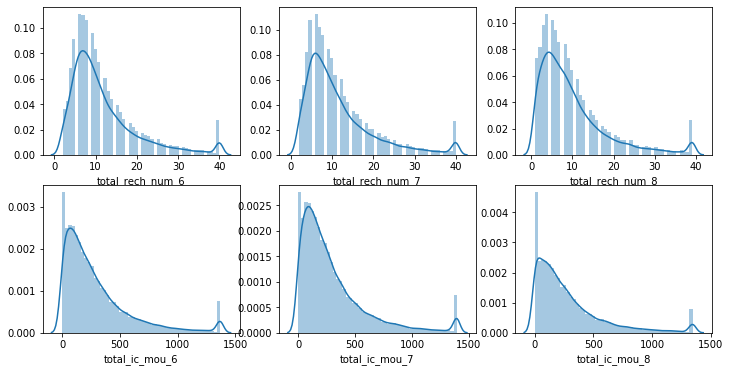

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(2,3,1)
sns.distplot(telecom_data_filtered['total_rech_num_6'])
plt.subplot(2,3,2)
sns.distplot(telecom_data_filtered['total_rech_num_7'])
plt.subplot(2,3,3)
sns.distplot(telecom_data_filtered['total_rech_num_8'])
plt.subplot(2,3,4)
sns.distplot(telecom_data_filtered['total_ic_mou_6'])
plt.subplot(2,3,5)
sns.distplot(telecom_data_filtered['total_ic_mou_7'])
plt.subplot(2,3,6)
sns.distplot(telecom_data_filtered['total_ic_mou_8'])
plt.show()

In [45]:
# EDA @ 10 :
# Some observation from univariate analysis of above features:
# - total_rech_num are concentrate arround ~9
# - total incoming data is concentrated arround ~ 100 minutes

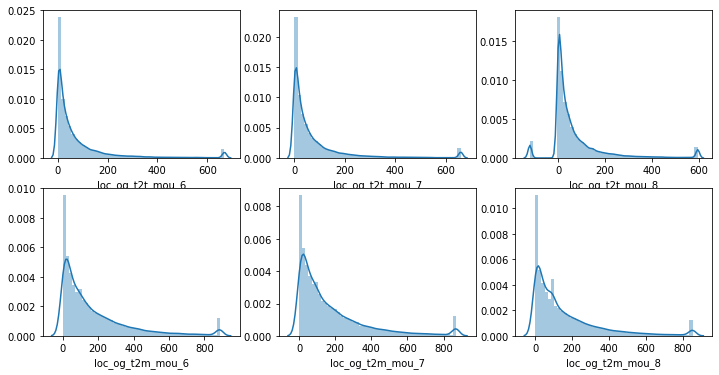

In [46]:
plt.figure(figsize=(12, 6))
plt.subplot(2,3,1)
sns.distplot(telecom_data_filtered['loc_og_t2t_mou_6'])
plt.subplot(2,3,2)
sns.distplot(telecom_data_filtered['loc_og_t2t_mou_7'])
plt.subplot(2,3,3)
sns.distplot(telecom_data_filtered['loc_og_t2t_mou_8'])
plt.subplot(2,3,4)
sns.distplot(telecom_data_filtered['loc_og_t2m_mou_6'])
plt.subplot(2,3,5)
sns.distplot(telecom_data_filtered['loc_og_t2m_mou_7'])
plt.subplot(2,3,6)
sns.distplot(telecom_data_filtered['loc_og_t2m_mou_8'])
plt.show()

In [47]:
# EDA @ 11 :
# Some observation from univariate analysis of above features:
# - local outgoing t2t are concentrate arround ~ 10 mins
# - local outgoing t2m is concentrated arround ~ 10 mins

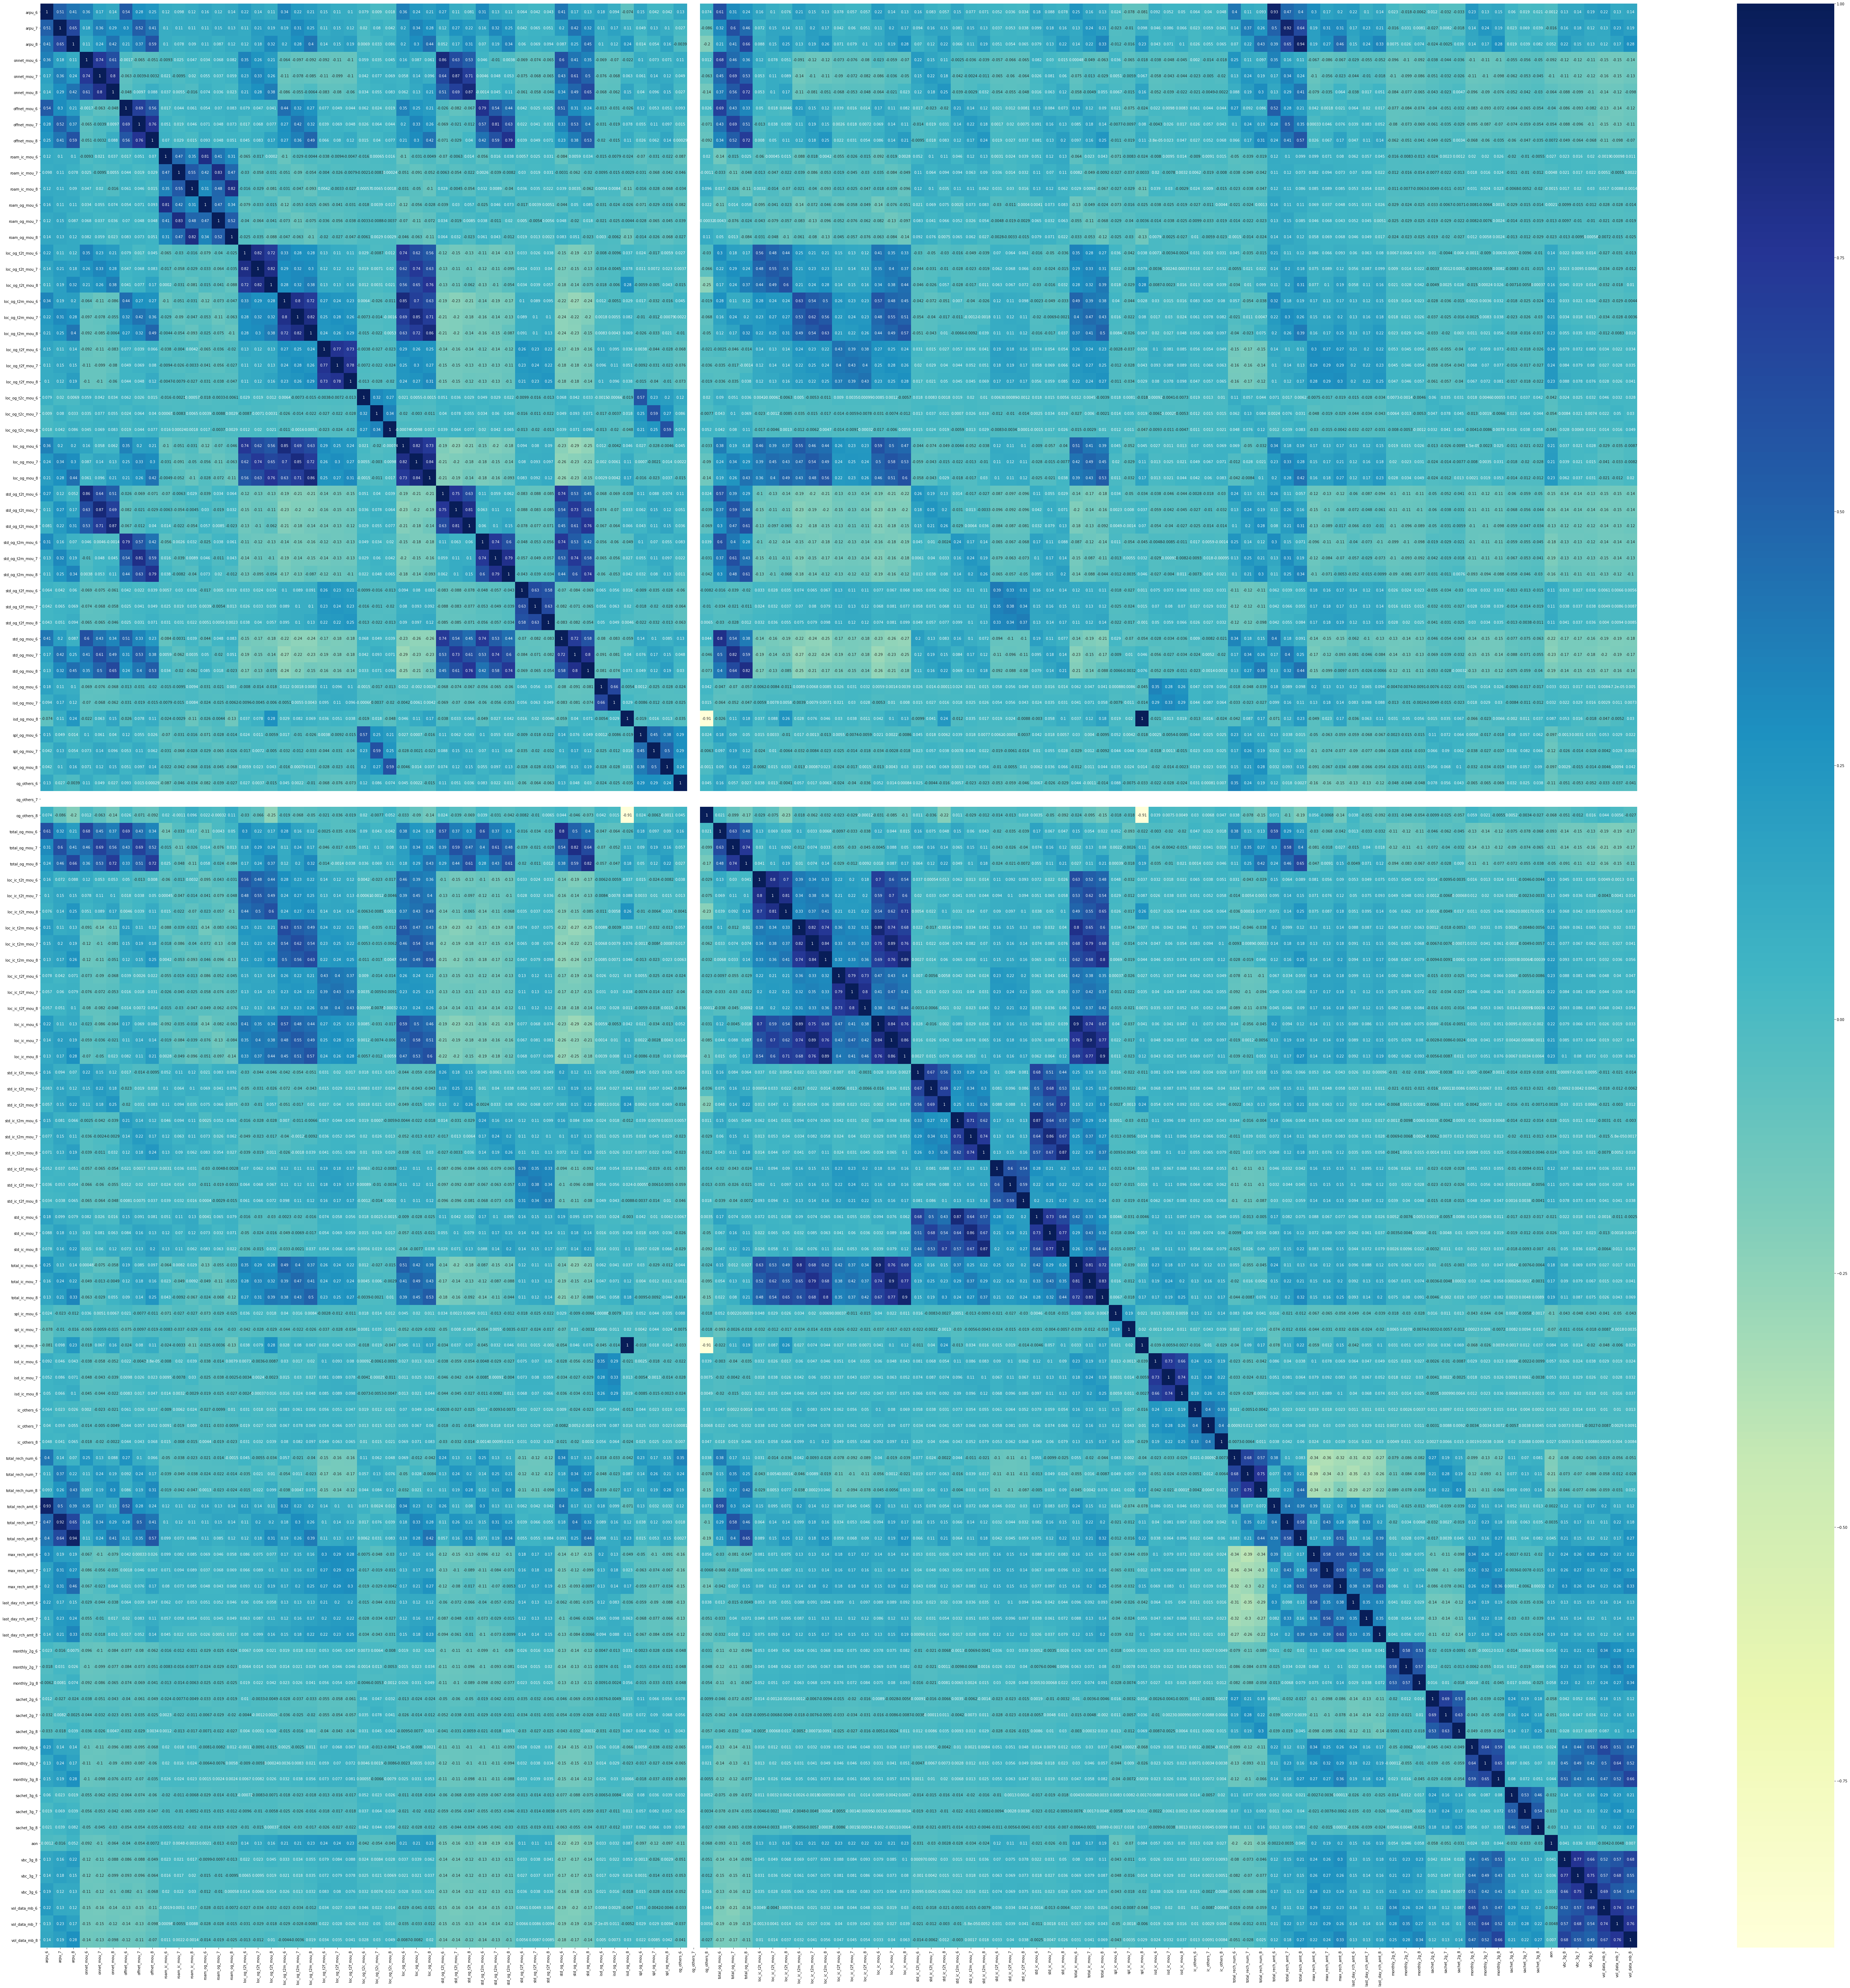

In [48]:
plt.figure(figsize=(100, 100))
sns.heatmap(telecom_data_filtered.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [49]:
# EDA @ 12:
# total_recharge_num is highly correlated with arpu
# roam outgoing is highly corelated with roam incomming


### SPLIT  into Train and test

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

In [51]:
y_train.value_counts()

0    18967
1    2018 
Name: tot_mou_9, dtype: int64

In [52]:
y_test.value_counts()

0    8075
1    919 
Name: tot_mou_9, dtype: int64

### Scale

In [53]:
from sklearn.preprocessing import MinMaxScaler
minmax_sclr = MinMaxScaler()
X_train[X_train.columns] = minmax_sclr.fit_transform(X_train)
X_test[X_test.columns] = minmax_sclr.transform(X_test)

## MODEL1 without PCA

#### Feature Selection Using RFE

In [54]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight = 'balanced')

In [55]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [56]:
rfe.support_

array([False, False, False,  True,  True,  True, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [57]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 87),
 ('arpu_7', False, 10),
 ('arpu_8', False, 16),
 ('onnet_mou_6', True, 1),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 2),
 ('offnet_mou_7', False, 31),
 ('offnet_mou_8', False, 32),
 ('roam_ic_mou_6', False, 92),
 ('roam_ic_mou_7', False, 20),
 ('roam_ic_mou_8', False, 89),
 ('roam_og_mou_6', False, 101),
 ('roam_og_mou_7', False, 93),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 72),
 ('loc_og_t2t_mou_7', False, 44),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 82),
 ('loc_og_t2m_mou_7', False, 80),
 ('loc_og_t2m_mou_8', False, 4),
 ('loc_og_t2f_mou_6', False, 63),
 ('loc_og_t2f_mou_7', False, 60),
 ('loc_og_t2f_mou_8', False, 61),
 ('loc_og_t2c_mou_6', False, 103),
 ('loc_og_t2c_mou_7', False, 95),
 ('loc_og_t2c_mou_8', False, 37),
 ('loc_og_mou_6', False, 28),
 ('loc_og_mou_7', False, 34),
 ('loc_og_mou_8', False, 5),
 ('std_og_t2t_mou_6', False, 81),
 ('std_og_t2t_mou_7', True, 1),
 ('std_og_t2

In [58]:
col = X_train.columns[rfe.support_]

In [59]:
#15 best predictors as per RFE
print(col.tolist())

['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'std_og_t2t_mou_7', 'std_og_t2m_mou_8', 'std_og_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_7', 'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8']


##### Assessing the model with StatsModels

In [60]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[col])
# Using this model for feature selection only, final model will be created sklearn to handle data imbalance
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              tot_mou_9   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20969
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4227.1
Date:                Mon, 12 Oct 2020   Deviance:                       8454.1
Time:                        22:53:09   Pearson chi2:                 1.12e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.8006      0.148     18.933      0.000       2.511       3.091
onnet_mou_6            0.9122      0.163      5.603      0.000       0.593       1.231
onnet_mou_7            2.1324      0.465      4.581      0.000       1.220       3.045
onnet_mou_8           -1.6461      0.275     -5.993      0.000      -2.184      -1.108
roam_og_mou_8          1.3470      0.114     11.821      0.000       1.124       1.570
loc_og_t2t_mou_8      -2.1943      0.535     -4.100      0.000      -3.243      -1.145
std_og_t2t_mou_7      -2.9337      0.451     -6.506      0.000      -3.817      -2.050
std_og_t2m_mou_8      -1.8098      0.244     -7.416      0.000      -2.288      -1.332
std_og_mou_7           1.8649      0.222      8.404      0.000       1.430       2.300
loc_ic_t2t_mou_8      -3.9635      0.507     -7.824      0.000      -4.956      -2.971
loc_ic_t2m_mou_8      -6.8293      0.473    -14.453      0.000      -7.755      -5.903
loc_ic_t2f_mou_8      -2.2631      0.400     -5.653      0.000      -3.048      -1.478
loc_ic_mou_7           2.6630      0.289      9.220      0.000       2.097       3.229
spl_ic_mou_8          -3.0781      0.183    -16.864      0.000      -3.436      -2.720
total_rech_num_8      -1.8477      0.215     -8.579      0.000      -2.270      -1.426
last_day_rch_amt_8    -1.8526      0.183    -10.110      0.000      -2.212      -1.493
======================================================================================
"""

In [61]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1   onnet_mou_7         16.70
5   std_og_t2t_mou_7    15.18
4   loc_og_t2t_mou_8    12.28
7   std_og_mou_7        8.44 
12  spl_ic_mou_8        8.34 
8   loc_ic_t2t_mou_8    7.15 
11  loc_ic_mou_7        6.95 
2   onnet_mou_8         6.40 
9   loc_ic_t2m_mou_8    4.75 
6   std_og_t2m_mou_8    3.50 
0   onnet_mou_6         3.39 
13  total_rech_num_8    2.96 
14  last_day_rch_amt_8  2.06 
10  loc_ic_t2f_mou_8    1.57 
3   roam_og_mou_8       1.16

In [62]:
#The first model using RFE variable are highly correlated. 
#We will perform iterative manual tunning to get model will VIFs < 5, p value < 0.05 


In [63]:
col_m2 = col.tolist()
col_m2.remove('onnet_mou_7')

In [64]:
X_train_sm = sm.add_constant(X_train[col_m2])
# Using this model for feature selection only, final model will be created sklearn
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              tot_mou_9   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20970
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4236.9
Date:                Mon, 12 Oct 2020   Deviance:                       8473.7
Time:                        22:53:25   Pearson chi2:                 1.21e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.8112      0.148     18.996      0.000       2.521       3.101
onnet_mou_6            1.0612      0.160      6.645      0.000       0.748       1.374
onnet_mou_8           -1.4958      0.273     -5.478      0.000      -2.031      -0.961
roam_og_mou_8          1.4564      0.111     13.099      0.000       1.239       1.674
loc_og_t2t_mou_8      -1.0068      0.455     -2.214      0.027      -1.898      -0.116
std_og_t2t_mou_7      -1.2260      0.261     -4.702      0.000      -1.737      -0.715
std_og_t2m_mou_8      -1.8657      0.245     -7.615      0.000      -2.346      -1.386
std_og_mou_7           1.8941      0.222      8.520      0.000       1.458       2.330
loc_ic_t2t_mou_8      -4.0876      0.508     -8.039      0.000      -5.084      -3.091
loc_ic_t2m_mou_8      -7.0772      0.471    -15.015      0.000      -8.001      -6.153
loc_ic_t2f_mou_8      -2.3077      0.399     -5.783      0.000      -3.090      -1.526
loc_ic_mou_7           2.9057      0.283     10.274      0.000       2.351       3.460
spl_ic_mou_8          -3.2726      0.177    -18.541      0.000      -3.619      -2.927
total_rech_num_8      -1.8922      0.216     -8.767      0.000      -2.315      -1.469
last_day_rch_amt_8    -1.8758      0.183    -10.224      0.000      -2.235      -1.516
======================================================================================
"""

In [65]:
vif = pd.DataFrame()
vif['Features'] = X_train[col_m2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_m2].values, i) for i in range(X_train[col_m2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3   loc_og_t2t_mou_8    8.74
6   std_og_mou_7        8.42
4   std_og_t2t_mou_7    8.02
11  spl_ic_mou_8        7.41
7   loc_ic_t2t_mou_8    7.08
10  loc_ic_mou_7        6.78
1   onnet_mou_8         6.16
8   loc_ic_t2m_mou_8    4.67
5   std_og_t2m_mou_8    3.49
0   onnet_mou_6         3.08
12  total_rech_num_8    2.96
13  last_day_rch_amt_8  2.06
9   loc_ic_t2f_mou_8    1.57
2   roam_og_mou_8       1.14

In [66]:
col_m2.remove('loc_og_t2t_mou_8')

In [67]:
X_train_sm = sm.add_constant(X_train[col_m2])
# Using this model for feature selection only, final model will be created sklearn
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              tot_mou_9   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20971
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4239.6
Date:                Mon, 12 Oct 2020   Deviance:                       8479.1
Time:                        22:53:38   Pearson chi2:                 1.40e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.8256      0.148     19.094      0.000       2.536       3.116
onnet_mou_6            1.0049      0.158      6.375      0.000       0.696       1.314
onnet_mou_8           -1.7155      0.258     -6.646      0.000      -2.221      -1.210
roam_og_mou_8          1.4709      0.111     13.249      0.000       1.253       1.688
std_og_t2t_mou_7      -1.0825      0.252     -4.299      0.000      -1.576      -0.589
std_og_t2m_mou_8      -1.8571      0.245     -7.587      0.000      -2.337      -1.377
std_og_mou_7           1.8924      0.223      8.501      0.000       1.456       2.329
loc_ic_t2t_mou_8      -4.5114      0.481     -9.373      0.000      -5.455      -3.568
loc_ic_t2m_mou_8      -7.1769      0.471    -15.246      0.000      -8.099      -6.254
loc_ic_t2f_mou_8      -2.3339      0.399     -5.846      0.000      -3.116      -1.551
loc_ic_mou_7           2.9146      0.283     10.291      0.000       2.360       3.470
spl_ic_mou_8          -3.3956      0.168    -20.252      0.000      -3.724      -3.067
total_rech_num_8      -1.8761      0.216     -8.704      0.000      -2.299      -1.454
last_day_rch_amt_8    -1.8841      0.183    -10.275      0.000      -2.244      -1.525
======================================================================================
"""

In [68]:
vif = pd.DataFrame()
vif['Features'] = X_train[col_m2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_m2].values, i) for i in range(X_train[col_m2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
5   std_og_mou_7        8.42
3   std_og_t2t_mou_7    6.78
9   loc_ic_mou_7        6.78
10  spl_ic_mou_8        6.31
6   loc_ic_t2t_mou_8    6.02
7   loc_ic_t2m_mou_8    4.66
1   onnet_mou_8         4.56
4   std_og_t2m_mou_8    3.49
11  total_rech_num_8    2.96
0   onnet_mou_6         2.88
12  last_day_rch_amt_8  2.05
8   loc_ic_t2f_mou_8    1.57
2   roam_og_mou_8       1.14

In [69]:
col_m2.remove('std_og_mou_7')

In [70]:
X_train_sm = sm.add_constant(X_train[col_m2])
# Using this model for feature selection only, final model will be created sklearn
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              tot_mou_9   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20972
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4275.1
Date:                Mon, 12 Oct 2020   Deviance:                       8550.2
Time:                        22:53:50   Pearson chi2:                 1.81e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.9168      0.149     19.637      0.000       2.626       3.208
onnet_mou_6            0.8595      0.157      5.492      0.000       0.553       1.166
onnet_mou_8           -1.8355      0.261     -7.022      0.000      -2.348      -1.323
roam_og_mou_8          1.5517      0.110     14.100      0.000       1.336       1.767
std_og_t2t_mou_7       0.3767      0.183      2.056      0.040       0.018       0.736
std_og_t2m_mou_8      -0.5916      0.183     -3.233      0.001      -0.950      -0.233
loc_ic_t2t_mou_8      -4.7785      0.486     -9.841      0.000      -5.730      -3.827
loc_ic_t2m_mou_8      -7.6227      0.473    -16.109      0.000      -8.550      -6.695
loc_ic_t2f_mou_8      -2.4434      0.403     -6.068      0.000      -3.233      -1.654
loc_ic_mou_7           3.1581      0.281     11.222      0.000       2.607       3.710
spl_ic_mou_8          -3.2983      0.168    -19.634      0.000      -3.628      -2.969
total_rech_num_8      -1.9967      0.215     -9.281      0.000      -2.418      -1.575
last_day_rch_amt_8    -2.0404      0.183    -11.166      0.000      -2.399      -1.682
======================================================================================
"""

In [71]:
vif = pd.DataFrame()
vif['Features'] = X_train[col_m2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_m2].values, i) for i in range(X_train[col_m2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
8   loc_ic_mou_7        6.75
9   spl_ic_mou_8        6.12
5   loc_ic_t2t_mou_8    6.01
6   loc_ic_t2m_mou_8    4.64
1   onnet_mou_8         4.55
3   std_og_t2t_mou_7    3.15
10  total_rech_num_8    2.95
0   onnet_mou_6         2.88
11  last_day_rch_amt_8  2.04
7   loc_ic_t2f_mou_8    1.57
4   std_og_t2m_mou_8    1.48
2   roam_og_mou_8       1.13

In [72]:
col_m2.remove('loc_ic_mou_7')

In [73]:
X_train_sm = sm.add_constant(X_train[col_m2])
# Using this model for feature selection only, final model will be created sklearn
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              tot_mou_9   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20973
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4334.5
Date:                Mon, 12 Oct 2020   Deviance:                       8669.0
Time:                        22:54:38   Pearson chi2:                 1.25e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.7659      0.147     18.813      0.000       2.478       3.054
onnet_mou_6            0.8857      0.156      5.665      0.000       0.579       1.192
onnet_mou_8           -2.1524      0.264     -8.165      0.000      -2.669      -1.636
roam_og_mou_8          1.6992      0.109     15.616      0.000       1.486       1.912
std_og_t2t_mou_7       0.4969      0.183      2.717      0.007       0.138       0.855
std_og_t2m_mou_8      -0.7131      0.184     -3.878      0.000      -1.074      -0.353
loc_ic_t2t_mou_8      -3.0719      0.469     -6.548      0.000      -3.991      -2.152
loc_ic_t2m_mou_8      -5.4339      0.422    -12.888      0.000      -6.260      -4.607
loc_ic_t2f_mou_8      -2.0640      0.407     -5.077      0.000      -2.861      -1.267
spl_ic_mou_8          -3.2239      0.170    -18.999      0.000      -3.556      -2.891
total_rech_num_8      -2.1588      0.216     -9.991      0.000      -2.582      -1.735
last_day_rch_amt_8    -2.1629      0.182    -11.857      0.000      -2.520      -1.805
======================================================================================
"""

In [74]:
vif = pd.DataFrame()
vif['Features'] = X_train[col_m2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_m2].values, i) for i in range(X_train[col_m2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
8   spl_ic_mou_8        6.09
1   onnet_mou_8         4.53
5   loc_ic_t2t_mou_8    4.48
3   std_og_t2t_mou_7    3.15
9   total_rech_num_8    2.94
0   onnet_mou_6         2.88
6   loc_ic_t2m_mou_8    2.55
10  last_day_rch_amt_8  2.04
7   loc_ic_t2f_mou_8    1.50
4   std_og_t2m_mou_8    1.47
2   roam_og_mou_8       1.12

In [75]:
col_m2.remove('spl_ic_mou_8')

In [76]:
X_train_sm = sm.add_constant(X_train[col_m2])
# Using this model for feature selection only, final model will be created sklearn
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              tot_mou_9   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20974
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4520.0
Date:                Mon, 12 Oct 2020   Deviance:                       9040.0
Time:                        22:56:48   Pearson chi2:                 5.71e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.0034      0.085     11.844      0.000       0.837       1.169
onnet_mou_6            1.0436      0.152      6.879      0.000       0.746       1.341
onnet_mou_8           -2.1536      0.269     -8.013      0.000      -2.680      -1.627
roam_og_mou_8          1.8293      0.109     16.850      0.000       1.617       2.042
std_og_t2t_mou_7       0.3324      0.182      1.830      0.067      -0.024       0.688
std_og_t2m_mou_8      -0.5394      0.178     -3.026      0.002      -0.889      -0.190
loc_ic_t2t_mou_8     -11.7040      0.485    -24.154      0.000     -12.654     -10.754
loc_ic_t2m_mou_8      -2.5423      0.307     -8.282      0.000      -3.144      -1.941
loc_ic_t2f_mou_8      -1.1153      0.316     -3.528      0.000      -1.735      -0.496
total_rech_num_8      -2.7077      0.222    -12.188      0.000      -3.143      -2.272
last_day_rch_amt_8    -2.2354      0.180    -12.407      0.000      -2.589      -1.882
======================================================================================
"""

In [77]:
vif = pd.DataFrame()
vif['Features'] = X_train[col_m2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_m2].values, i) for i in range(X_train[col_m2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1  onnet_mou_8         4.51
5  loc_ic_t2t_mou_8    3.50
3  std_og_t2t_mou_7    3.09
0  onnet_mou_6         2.84
6  loc_ic_t2m_mou_8    2.53
8  total_rech_num_8    2.47
9  last_day_rch_amt_8  1.78
7  loc_ic_t2f_mou_8    1.49
4  std_og_t2m_mou_8    1.45
2  roam_og_mou_8       1.10

In [78]:
col_m2.remove('std_og_t2t_mou_7')

In [79]:
X_train_sm = sm.add_constant(X_train[col_m2])
# Using this model for feature selection only, final model will be created sklearn
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              tot_mou_9   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20975
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4521.7
Date:                Mon, 12 Oct 2020   Deviance:                       9043.4
Time:                        22:56:56   Pearson chi2:                 6.04e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.0185      0.084     12.073      0.000       0.853       1.184
onnet_mou_6            1.1852      0.130      9.086      0.000       0.930       1.441
onnet_mou_8           -1.9489      0.242     -8.058      0.000      -2.423      -1.475
roam_og_mou_8          1.8119      0.108     16.771      0.000       1.600       2.024
std_og_t2m_mou_8      -0.5369      0.178     -3.015      0.003      -0.886      -0.188
loc_ic_t2t_mou_8     -11.7882      0.482    -24.432      0.000     -12.734     -10.843
loc_ic_t2m_mou_8      -2.5875      0.307     -8.429      0.000      -3.189      -1.986
loc_ic_t2f_mou_8      -1.1362      0.317     -3.588      0.000      -1.757      -0.516
total_rech_num_8      -2.7134      0.222    -12.222      0.000      -3.149      -2.278
last_day_rch_amt_8    -2.2479      0.180    -12.483      0.000      -2.601      -1.895
======================================================================================
"""

In [80]:
vif = pd.DataFrame()
vif['Features'] = X_train[col_m2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_m2].values, i) for i in range(X_train[col_m2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1  onnet_mou_8         3.31
4  loc_ic_t2t_mou_8    3.31
5  loc_ic_t2m_mou_8    2.53
7  total_rech_num_8    2.47
0  onnet_mou_6         2.44
8  last_day_rch_amt_8  1.78
6  loc_ic_t2f_mou_8    1.49
3  std_og_t2m_mou_8    1.44
2  roam_og_mou_8       1.10

In [81]:
# For following list of features, p value is significant and VIF < 5
print(col_m2)

['onnet_mou_6', 'onnet_mou_8', 'roam_og_mou_8', 'std_og_t2m_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8']


In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg_fin = LogisticRegression(random_state=0, class_weight = 'balanced')
logreg_fin.fit(X_train[col_m2], y_train)

LogisticRegression(class_weight='balanced', random_state=0)

In [83]:
Y_pred = logreg_fin.predict(X_train[col_m2])

print ("Accuracy : %.4g" % metrics.accuracy_score(y_train, Y_pred))
print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, Y_pred))


Accuracy : 0.8056
Recall/Sensitivity : 0.8132


In [84]:

metrics.confusion_matrix(y_train, Y_pred)

array([[15264,  3703],
       [  377,  1641]], dtype=int64)

In [85]:
# Model Evaluation on Test Data and collecting the metrics
Y_pred_test = logreg_fin.predict(X_test[col_m2])

print ("Accuracy : %.4g" % metrics.accuracy_score(y_test, Y_pred_test))
print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_test, Y_pred_test))


Accuracy : 0.8094
Recall/Sensitivity : 0.8139


In [86]:
probability = logreg_fin.predict_proba(X_test[col_m2])

In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      8075
           1       0.33      0.81      0.47       919

    accuracy                           0.81      8994
   macro avg       0.65      0.81      0.68      8994
weighted avg       0.91      0.81      0.84      8994



In [88]:
## With final model1  Recall is 80%, And most significant variables for the model to detect churn as follows:
#onnet_mou_8, loc_ic_t2f_mou_8, std_og_t2m_mou_8

In [89]:
importance = list(logreg_fin.coef_[0])
cols = col_m2
cols.insert(0,'const')
top = pd.DataFrame(list(zip(cols,importance)))
top.columns = ['Feature','Coef']

In [90]:
top.sort_values(by='Coef',ascending=False).head(10)

Feature      Coef
2  onnet_mou_8       2.397765
0  const             1.674182
3  roam_og_mou_8    -0.301942
6  loc_ic_t2m_mou_8 -1.261548
8  total_rech_num_8 -2.073671
1  onnet_mou_6      -2.293652
5  loc_ic_t2t_mou_8 -2.485772
7  loc_ic_t2f_mou_8 -2.497510
4  std_og_t2m_mou_8 -6.203035

In [91]:
#Lets visualize how this variables are impacting the decision

In [92]:
new_df = X_test[['onnet_mou_8', 'loc_ic_t2f_mou_8', 'std_og_t2m_mou_8']]

In [93]:
prob_1 = []
for p in probability.tolist():
    prob_1.append(p[1])


In [94]:
new_df['prob_1'] = prob_1

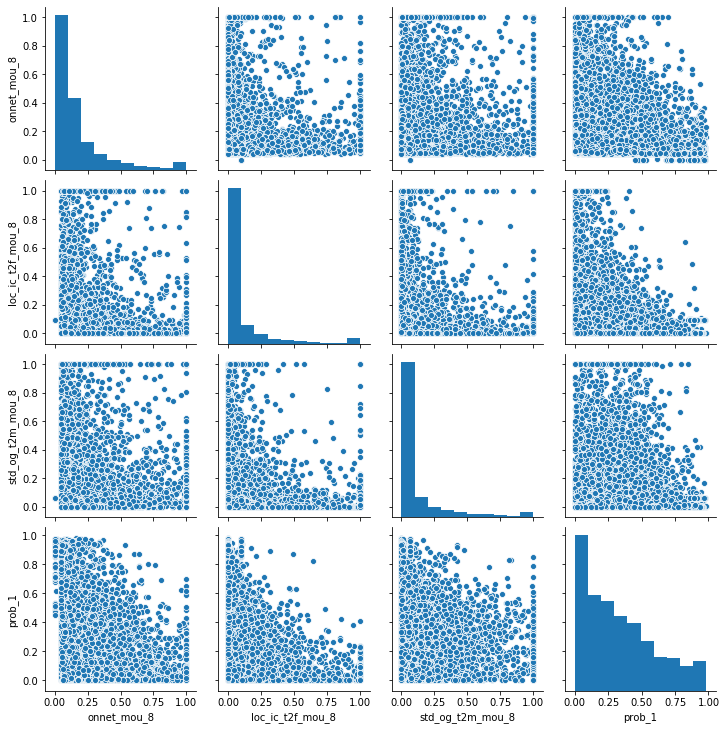

In [95]:
sns.pairplot(new_df)
plt.show()

Refer to last row of the pairplot, observe the top of left corner of each plot. 
 - The customers churning will be spending within 35% time(of max time by customer) on onnet   
 - The customers churning will be spending within 25% time(of max time by customer) on local incomming t2f on 8th month
 - The customers churning will be spending within 15% time(of max time by customer) on STD outgoing t2m on 8th month

### Applying PCA on Dataset

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(random_state=42)

In [ ]:
pca.fit(X_train)

In [ ]:
pca.explained_variance_ratio_

#### Determining number of components to get max variance using bar plot and scree plot

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [ ]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

In [ ]:
plt.plot(range(1,len(var_cumu)+1), var_cumu)

In [ ]:
# From the plot it seems that 75% of variance is explained by 20 component, if we add 20 more component variance explained reaches 85 % (just 10 % more)
# So choosing 20 component

In [ ]:
pc2 = PCA(n_components=40, random_state=42)

In [ ]:
X_train_pca = pc2.fit_transform(X_train)

In [ ]:
X_test_pca =  pc2.transform(X_test)

In [ ]:
X_train_pca.shape

In [ ]:
col_40 = []
for i in range(0,40):
    str_col = f"COL_{i}"
    col_40.append(str_col)
    
print(col_40)

In [ ]:
X_train_pca_df = pd.DataFrame(X_train_pca, columns=col_40)

In [ ]:
X_test_pca_df = pd.DataFrame(X_test_pca, columns=col_40)

In [ ]:
X_train_pca_df.shape

In [ ]:
X_test_pca_df.shape

In [ ]:
X_train_pca_df.head()

### Applying undersampling for removing imbalance

In [ ]:
# Random Undersampling
from imblearn.under_sampling import RandomUnderSampler
under_sample = RandomUnderSampler(random_state = 5)
X_train_us, y_train_us = under_sample.fit_resample(X_train_pca_df, y_train)

In [ ]:
100 * y_train_us.value_counts() / y_train_us.shape[0]

In [ ]:
X_train_us.shape

In [ ]:
y_train_us.shape

#### Helping functions

In [ ]:

def findOptimalCutoff(df):
    #Function to find the optimal cutoff for classifing as churn/non-churn
    # Let's create columns with different probability cutoffs 
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df[i] = df.churn_Prob.map( lambda x: 1 if x > i else 0)
    #print(df.head())
    
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    from sklearn.metrics import confusion_matrix
    
    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives
    
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(df.churn, df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.show()

In [ ]:

def getModelMetrics(actual_churn=False,pred_churn=False):

    confusion = metrics.confusion_matrix(actual_churn, pred_churn)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    print("Roc_auc_score : {}".format(metrics.roc_auc_score(actual_churn,pred_churn)))
    # Let's see the sensitivity of our logistic regression model
    print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
    # Let us calculate specificity
    print('Specificity: {}'.format(TN / float(TN+FP)))
    # Calculate false postive rate - predicting churn when customer does not have churned
    print('False Positive Rate: {}'.format(FP/ float(TN+FP)))
    # positive predictive value 
    print('Positive predictive value: {}'.format(TP / float(TP+FP)))
    # Negative predictive value
    print('Negative Predictive value: {}'.format(TN / float(TN+ FN)))
    # sklearn precision score value 
    print('sklearn precision score value: {}'.format(metrics.precision_score(actual_churn, pred_churn )))

In [ ]:
def predictChurnWithProb(model,X,y,prob):
    # Funtion to predict the churn using the input probability cut-off
    # Input arguments: model instance, x and y to predict using model and cut-off probability
    
    # predict
    pred_probs = model.predict_proba(X)[:,1]
    
    y_df= pd.DataFrame({'churn':y, 'churn_Prob':pred_probs})
    # Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
    y_df['final_predicted'] = y_df.churn_Prob.map( lambda x: 1 if x > prob else 0)
    # Let's see the head
    getModelMetrics(y_df.churn,y_df.final_predicted)
    return y_df

## MODEL2 (Decision Tree)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.metrics import classification_report

#### With undersampled data

In [ ]:
params = {
    "max_depth": [6, 8, 9, 10, 12, 14, 16],
    "min_samples_leaf": [60, 70, 80, 90, 100, 120, 130],
    "min_samples_split": [2, 5, 10, 20]
}

dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=5,
                           n_jobs=-1, verbose=1, scoring="recall")

grid_search.fit(X_train_us, y_train_us)

In [ ]:
grid_search.best_score_

In [ ]:
dt_best_us = grid_search.best_estimator_
dt_best_us

In [ ]:
y_test_pred_us = dt_best_us.predict(X_test_pca_df)

In [ ]:
print(classification_report(y_test, y_test_pred_us))

#### With class_weight = balances option

In [ ]:
params = {
    "max_depth": [6, 8, 9, 10, 12, 14, 16],
    "min_samples_leaf": [60, 70, 80, 90, 100, 120, 130],
    "min_samples_split": [2, 5, 10, 20]
}

In [ ]:
dt = DecisionTreeClassifier(criterion="entropy", class_weight="balanced", random_state=42)
grid_search_bal = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=5,
                           n_jobs=-1, verbose=1, scoring="recall")

In [ ]:
grid_search_bal.fit(X_train_pca_df, y_train)

In [ ]:
grid_search_bal.best_score_

In [ ]:
dt_best_bal = grid_search_bal.best_estimator_
dt_best_bal

In [ ]:
y_test_pred_bal = dt_best_bal.predict(X_test_pca_df)

In [ ]:
print(classification_report(y_test, y_test_pred_bal))

In [ ]:
# This model has a better performance than undersampled data model 

In [ ]:
# Lets calculate the Recall using confusion matrix and cutoff 0.5 
cut_off_prob=0.45
y_train_df = predictChurnWithProb(dt_best_bal,X_train_pca_df,y_train,cut_off_prob)
y_train_df.head()

In [ ]:
findOptimalCutoff(y_train_df)

In [ ]:
#So with cut off 0.45 and we have the best value of recall and other parameters

In [ ]:
cut_off_prob=0.45
y_test_df = predictChurnWithProb(dt_best_bal,X_test_pca_df,y_test,cut_off_prob)
y_test_df.head()

## MODEL3 (Random Forest)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [ ]:
params = {
    'max_depth': [2,3,5,6,7,8,9],
    'min_samples_leaf': [2,3,4,5,10,20,50],
    'n_estimators': [10, 25, 50, 100]
}
grid_search_rf = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="recall")
grid_search_rf.fit(X_train_us, y_train_us)

In [ ]:
grid_search_rf.best_score_

In [ ]:
rf_best_us = grid_search_rf.best_estimator_
rf_best_us

In [ ]:
y_rf_test_pred_us = rf_best_us.predict(X_test_pca_df)

In [ ]:
print(classification_report(y_test, y_rf_test_pred_us))

In [ ]:
# Hyperparameters for Random Forest
params = {
    'max_depth': [2,3,5,6,7,8,9],
    'min_samples_leaf': [2,3,4,5,10,20,50],
    'n_estimators': [10, 25, 50, 100],
    'criterion': ["gini", "entropy"],
    'class_weight' : ["balanced", "balanced_subsample"]
}

In [ ]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_search_rf_bal = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="recall")

In [ ]:
grid_search_rf_bal.fit(X_train_pca_df, y_train)

In [ ]:
grid_search_rf_bal.best_score_

In [ ]:
rf_best_bal = grid_search_rf_bal.best_estimator_
rf_best_bal

In [ ]:
y_rf_test_pred_bal = rf_best_bal.predict(X_test_pca_df)

In [ ]:
print(classification_report(y_test, y_rf_test_pred_bal))

In [ ]:
# From above models, model with undersampled data is performing better. Lets tune cut-off and measure the performance

In [ ]:
# Lets calculate the Recall using confusion matrix and cutoff 0.45 
cut_off_prob=0.40
y_train_rf = predictChurnWithProb(rf_best_us,X_train_us,y_train_us,cut_off_prob)
y_train_rf.head()

In [ ]:
findOptimalCutoff(y_train_rf)

In [ ]:
# Lets calculate the evaluation using confusion matrix and cutoff 0.40 
cut_off_prob=0.40
y_test_rf = predictChurnWithProb(rf_best_us,X_test_pca_df,y_test,cut_off_prob)
y_test_rf.head()

## MODEL4 (ADAboost with decision tree)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
shallow_tree1 = DecisionTreeClassifier(max_depth=2, random_state = 100)
shallow_tree2 = DecisionTreeClassifier(max_depth=5, random_state = 100)
shallow_tree3 = DecisionTreeClassifier(max_depth=7, random_state = 100)

In [ ]:
ada = AdaBoostClassifier(random_state=42)

In [ ]:
# Hyperparameters for Random Forest
params = {
    'base_estimator': [shallow_tree1, shallow_tree2, shallow_tree3],
    'n_estimators': [5,10,20,50,100,200],
    'learning_rate': [0.001, 0.01, 0.1, 0.5, 1]
}

In [ ]:
grid_search_ada = GridSearchCV(estimator=ada,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="recall")

#### Using undersampled data

In [ ]:
grid_search_ada.fit(X_train_us, y_train_us)

In [ ]:
grid_search_ada.best_score_

In [ ]:
ada_best_us = grid_search_ada.best_estimator_
ada_best_us

In [ ]:
y_ada_test_pred_us = ada_best_us.predict(X_test_pca_df)

In [ ]:
print(classification_report(y_test, y_ada_test_pred_us))

In [ ]:
# Lets calculate the Recall using confusion matrix and cutoff 0.5 
cut_off_prob=0.5
y_train_ada = predictChurnWithProb(ada_best_us,X_train_us,y_train_us,cut_off_prob)
y_train_ada.head()

In [ ]:
findOptimalCutoff(y_train_ada)

In [ ]:
# Lets calculate the Recall using confusion matrix and cutoff 0.5 
cut_off_prob=0.5
y_test_ada = predictChurnWithProb(ada_best_us,X_test_pca_df,y_test,cut_off_prob)
y_test_ada.head()

## Summary

Interpretableble model is logreg_fin (with class_weight=balanced): 
 - onnet_mou_8
 - loc_ic_t2f_mou_8
 - std_og_t2m_mou_8
 
 MODEL Eval: Test data Recall 0.81, Train data Recall 0.81
 
 Recommendation: 
 - The customers churning will be spending within 35% time(of 98 quantile value of onnet_mou_8) on all kind of call on operator on 8th month   
 - The customers churning will be spending within 25% time(of 98 quantile value of loc_ic_t2f_mou_8) on local incomming t2f on 8th month
 - The customers churning will be spending within 15% time(of 98 quantile value of std_og_t2m_mou_8) on STD outgoing t2m on 8th month
 
 Offer them some attractive offer based on above observation
 
 
 
 Max Recall value Model is rf_best_us (Random forest trained with undersampled data. Hyperparameter: max_depth=7, min_samples_leaf=3, n_estimators=10) with cutoff = 0.40
 - On Train Data
 -- Recall = 0.91
 -- Specificity = 0.81
 -- ROC_auc = 0.86
 - On Test Data
 -- Recall = 0.86
 -- Specificity = 0.74
 -- ROC_auc = 0.80